## Load necessary modules

In [2]:
!pip list | grep retinanet

keras-retinanet       0.5.1    


In [2]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2



# import keras
import keras

# import keras_retinanet
# from keras_retinanet.models.resnet import custom_objects
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color


# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.
/Users/oz/.pyenv/versions/3.6.1/envs/test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/oz/.pyenv/versions/3.6.1/envs/test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/oz/.pyenv/versions/3.6.1/envs/test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

## Load RetinaNet model

In [7]:

# adjust this to point to your downloaded/trained model
model_path = os.path.join('..', 'snapshots', 'resnet50_csv_29.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)
#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0 : 'Line'}

## Run detection on example

processing time:  6.40496301651001


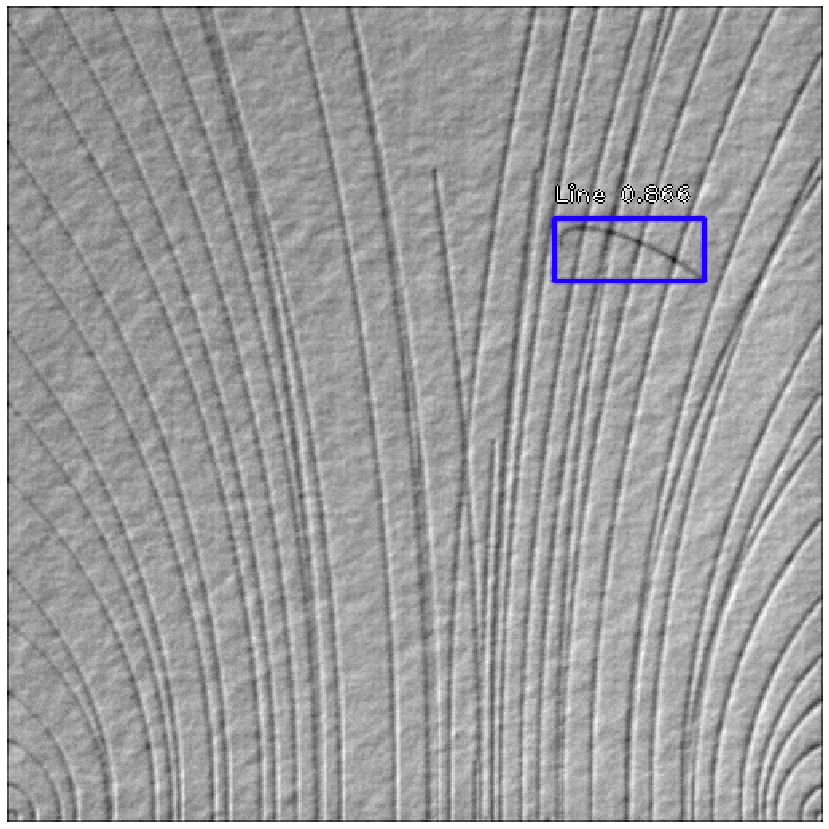

In [8]:
# load image
image = read_image_bgr('0013.PNG')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)


# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)
# print('boxes : ',boxes)
# print("scores :",scores)
# print("labels",labels)
# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

In [9]:
# load image
image = read_image_bgr('0013.PNG')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
_, _, detections = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# compute predicted labels and scores
predicted_labels = np.argmax(detections[0, :, 4:], axis=1)
scores = detections[0, np.arange(detections.shape[1]), 4 + predicted_labels]

# correct for image scale
detections[0, :, :4] /= scale

# visualize detections
for idx, (label, score) in enumerate(zip(predicted_labels, scores)):
    if score < 0.5:
        continue
    b = detections[0, idx, :4].astype(int)
    cv2.rectangle(draw, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 3)
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 0), 3)
    cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 255, 255), 2)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

AttributeError: module 'keras_retinanet.models' has no attribute 'predict_on_batch'

In [19]:
import colorsys
import random
N = len(labels_to_names)
HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
RGB_tuples = list(map(lambda x: tuple(255*np.array(colorsys.hsv_to_rgb(*x))), HSV_tuples))
random.shuffle(RGB_tuples)


In [21]:
# from tensorflow.python.client import device_lib

# def get_available_gpus():
#     local_device_protos = device_lib.list_local_devices()
#     return [x.physical_device_desc for x in local_device_protos if x.device_type == 'GPU']

# GPU = get_available_gpus()[-1][17:33]
# print(GPU)

In [33]:
!ls ../../

AOI-keras-retinanet     chaplin.mp4             project60.avi
PCB-keras-retinanet     project.avi
PCB-keras-retinanet.zip project30.avi


In [ ]:
# import cv2

# # 開啟影片檔案
# cap = cv2.VideoCapture('my_video.avi')

# # 以迴圈從影片檔案讀取影格，並顯示出來
# while(cap.isOpened()):
#   ret, frame = cap.read()

#   cv2.imshow('frame',frame)
#   if cv2.waitKey(1) & 0xFF == ord('q'):
#     break

# cap.release()
# cv2.destroyAllWindows()

In [5]:

cap = cv2.VideoCapture('../../project60.avi')


# cap = cap.convert('RGB')
counter = 0
sum_time=0
while(True):
    ret, draw = cap.read()
    if not ret:
        break

    bgr = cv2.cvtColor(draw, cv2.COLOR_RGB2BGR)
    # preprocess image for network
    image = preprocess_image(bgr)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    _, _, detections = model.predict_on_batch(np.expand_dims(image, axis=0))
    t = time.time() - start
#     print("processing time: ", t)
    print(detections.size)
    # compute predicted labels and scores
    
    predicted_labels = np.argmax(detections[0, :, 4:], axis=1)
    scores = detections[0, np.arange(detections.shape[1]), 4 + predicted_labels]

    # correct for image scale
    detections[0, :, :4] /= scale

    # visualize detections
    for idx, (label, score) in enumerate(zip(predicted_labels, scores)):
        if score < 0.5:
            continue
        b = detections[0, idx, :4].astype(int)
        cv2.rectangle(draw, (b[0], b[1]), (b[2], b[3]), RGB_tuples[label], 6)
        caption = "%s: %.1f%%"%(labels_to_names[label], score*100)
        cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 5)
        cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        if sum_time>0:
            cv2.putText(draw, "%s Processing time %.2fs (%.1ffps)  AVG %.2fs (%.1ffps)"%(GPU, t,1.0/t,sum_time/counter,counter/sum_time), (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 7)
            cv2.putText(draw, "%s Processing time %.2fs (%.1ffps)  AVG %.2fs (%.1ffps)"%(GPU, t,1.0/t,sum_time/counter,counter/sum_time), (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)
    cv2.imwrite('/tmp/img%08d.jpg'%counter,draw)
    counter=counter+1
    sum_time+=t

cap.release()
cv2.destroyAllWindows()


NameError: name 'model' is not defined

In [62]:
from timeit import default_timer as timer
from PIL import Image, ImageFont, ImageDraw
import cv2
vid = cv2.VideoCapture('../../project60.avi')
counter = 0
sum_time=0
while(cap.isOpened()):
    return_value, frame = vid.read()

    bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    # preprocess image for network
    image = preprocess_image(bgr)
    image, scale = resize_image(image)
    
#     image = yolo.detect_image(image)
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    t = time.time() - start
    boxes /= scale
    
        # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores aqre sorted so we can break
        if score < 0.3:
            break

        color = label_color(label)

        b = box.astype(int)
        draw_box(bgr, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)

        
        cv2.imshow('frame',draw)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
#     plt.figure(figsize=(15, 15))
#     plt.axis('off')
#     plt.imshow(draw)
#     plt.show()
#     plt.close()
vid.release()
cv2.destroyAllWindows()




KeyboardInterrupt: 